<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
#создаем df из внешних файлов
rows = pd.read_excel('Rows.xlsx', index_col=0)  
stat = pd.read_excel('Stat.xlsx', index_col=0)  

C:\Users\nevge\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [53]:
#обработка данных
pd.set_option('display.max_columns', None)
rows['UserLogin']=rows['USER/DATE'].str.replace('*', '')
rows['UserLogin']=rows['UserLogin'].str.split(' ', expand=True)[0]

#наиболее характерные показатели
#Продуктивность - показывает как много звонков совершает пользователь за единицу времени
rows['Productivity']=rows['NUM OF CONNECTED']/rows['WORK TIME']
#Эффективность - показывает долю аппрувов среди валидных лидов
rows['CLN APP.']
#Эффективность во времени - показывает как много аппрувов за единицу времени
rows['Time Efficiency']=rows['PROC.']/rows['WORK TIME']
#Средний чек - показывает среднюю доходность работы каждого сотрудника
rows['AVG CHECK']
#Показтели эффективность обработки аппрува с точки зрения доп продаж - показывает апсейлы и кросс-продажи на один аппрув
rows['UPS.%']
rows['CROSS%']

rows.replace([np.inf, -np.inf], np.nan, inplace=True)
rows.dropna(inplace=True)

rows['Scores']=(rows['Time Efficiency'].rank(ascending=True)*1
+rows['CLN APP.'].rank(ascending=True)*1.2
+rows['AVG CHECK'].rank(ascending=True)*1.1
+rows['UPS.%'].rank(ascending=True)*0.9
+rows['CROSS%'].rank(ascending=True)*0.7
+rows['Productivity'].rank(ascending=True)*0.7)

users_top=rows[['UserLogin', 'Time Efficiency', 'CLN APP.', 'AVG CHECK', 'UPS.%', 'CROSS%', 'Productivity', 'Scores']]


#Создаем простейшую рейтингтвую модель. В зависимости от рейтинга показателей даем операторам "баллы" с экспертной оценкой веса

top_10=rows.sort_values('Scores', ascending=False).head(10)
top_10.sort_values('Scores', ascending=True, inplace=True)
top_10_show=users_top.sort_values('Scores', ascending=False).head(10)
top_10_show.drop('Scores',1,inplace=True)
rows

C:\Users\nevge\AppData\Local\Temp/ipykernel_20316/3660178653.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rows['UserLogin']=rows['USER/DATE'].str.replace('*', '')
C:\Users\nevge\AppData\Local\Temp/ipykernel_20316/3660178653.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  top_10_show.drop('Scores',1,inplace=True)


,USER/DATE,TOTAL,VALID,VALID%,WORK TIME,APP HOUR,PROC.,DRT. APP.,CLN APP.,WORK APP. %,TOTAL APP.,AVG CHECK,UPS.,UPS.%,CROSS,CROSS%,REJ.,REJ.%,DECL.,DECL.%,NUM OF CONNECTED,CONNECTED %,MAN. CALLB.,MAN. CALLB.%,TEST,TEST%,DEADSTOCK QTY,DEADSTOCK ADDED VALUE,UserLogin,Productivity,Time Efficiency,Scores,Region
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2271.0,*col.co.1308 Sharon Andrea Uribe Salazar,105.0,62.0,0.590476,1.969907,0.994125,47.0,0.447619,0.758065,0.758065,0.758065,58.784940,34.0,0.723404,4.0,0.085106,15.0,0.142857,43.0,0.409524,103.0,0.980952,0.0,0.0,0.0,0.0,0.0,0.0,col.co.1308,52.286722,23.858989,949.80,COL
2291.0,*col.co.1309 Alcin Rubio,57.0,36.0,0.631579,0.490602,1.189016,14.0,0.245614,0.388889,0.388889,0.388889,84.210471,12.0,0.857143,0.0,0.000000,22.0,0.385965,21.0,0.368421,57.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,col.co.1309,116.183826,28.536378,925.85,COL
2099.0,*col.pe.1149 Julieth Gonzalez Cruz,61.0,41.0,0.672131,0.570475,1.972042,27.0,0.442623,0.658537,0.658537,0.658537,56.187859,13.0,0.481481,0.0,0.000000,14.0,0.229508,20.0,0.327869,61.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,col.pe.1149,106.928524,47.329019,752.00,COL
1652.0,*col.pe.1314 Walter Andres Leyton Cutiva,35.0,20.0,0.571429,0.219225,2.280767,12.0,0.342857,0.600000,0.600000,0.600000,70.325142,9.0,0.750000,0.0,0.000000,8.0,0.228571,15.0,0.428571,35.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,col.pe.1314,159.653661,54.738398,1079.95,COL
2204.0,*col.pe.1334 Marcela Alexandra Martinez Gomez,221.0,108.0,0.488688,2.076806,1.384338,69.0,0.312217,0.638889,0.638889,0.638889,67.797772,49.0,0.710145,5.0,0.072464,39.0,0.176471,113.0,0.511312,221.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,col.pe.1334,106.413429,33.224102,1108.50,COL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730.0,msk_oper_col788 Адиарис Торрес Бланко,119.0,73.0,0.613445,1.778160,0.843569,36.0,0.302521,0.493151,0.493151,0.493151,69.575950,32.0,0.888889,4.0,0.111111,37.0,0.310924,46.0,0.386555,119.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,msk_oper_col788,66.923122,20.245650,887.10,OTHER
2732.0,msk_oper_col790 Кармен Элизабет Пино,56.0,25.0,0.446429,0.934560,0.356674,8.0,0.142857,0.320000,0.320000,0.320000,64.473625,5.0,0.625000,0.0,0.000000,17.0,0.303571,31.0,0.553571,56.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,msk_oper_col790,59.921234,8.560176,495.50,OTHER
2281.0,msk_oper_esp_363 Аллан Альварес,105.0,76.0,0.723810,0.692211,3.250456,54.0,0.514286,0.710526,0.729730,0.729730,78.185185,19.0,0.351852,4.0,0.074074,20.0,0.190476,29.0,0.276190,105.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,msk_oper_esp_363,151.687930,78.010935,1210.95,OTHER


In [46]:
#Топы по отдельным категориям
N=10
top_TimeEf = rows.loc[rows['UserLogin'].isin(users_top.sort_values('Time Efficiency', ascending=False).head(N)['UserLogin'].tolist())].sort_values('Time Efficiency', ascending=True)
top_Check = rows.loc[rows['UserLogin'].isin(users_top.sort_values('AVG CHECK', ascending=False).head(10)['UserLogin'].tolist())].sort_values('Time Efficiency', ascending=True)
top_Ups = rows.loc[rows['UserLogin'].isin(users_top.sort_values('UPS.%', ascending=False).head(N)['UserLogin'].tolist())].sort_values('Time Efficiency', ascending=True)
top_Cross = rows.loc[rows['UserLogin'].isin(users_top.sort_values('CROSS%', ascending=False).head(N)['UserLogin'].tolist())].sort_values('Time Efficiency', ascending=True)
top_Prod = rows.loc[rows['UserLogin'].isin(users_top.sort_values('Productivity', ascending=False).head(N)['UserLogin'].tolist())].sort_values('Time Efficiency', ascending=True)

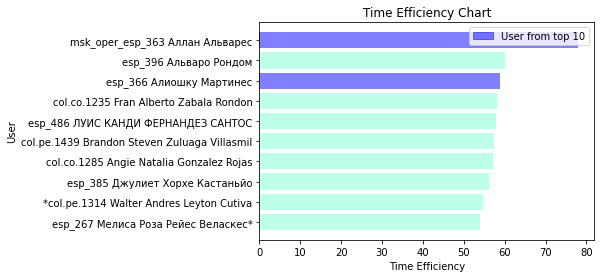

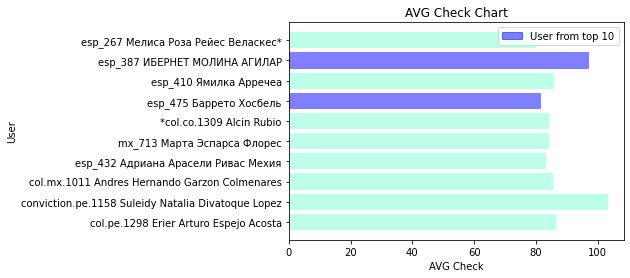

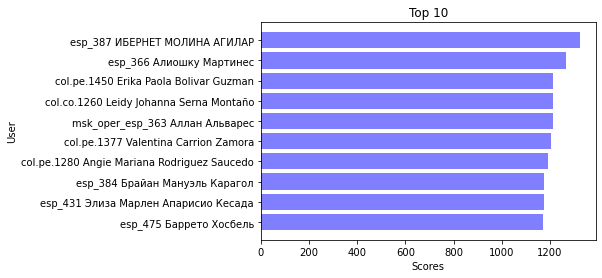

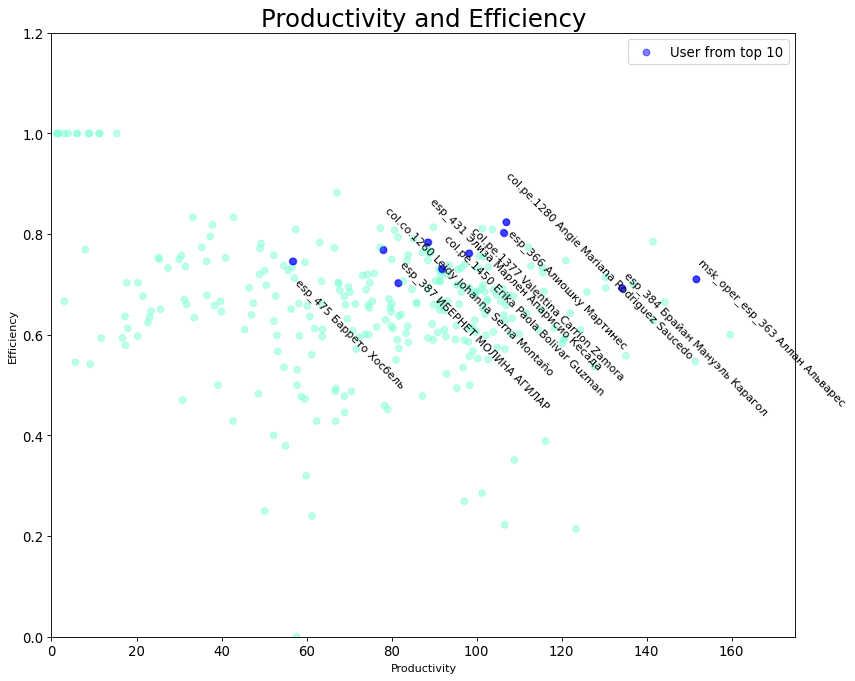

,UserLogin,Time Efficiency,CLN APP.,AVG CHECK,UPS.%,CROSS%,Productivity
ID,,,,,,,
2657.0,esp_387,39.051044,0.703125,97.288889,0.911111,0.755556,81.573291
704.0,esp_366,58.930026,0.824000,78.407767,0.300971,0.077670,106.989464
2672.0,col.pe.1450,33.834424,0.731343,69.487271,0.775510,0.061224,91.836294
670.0,col.co.1260,39.898670,0.769231,69.191671,0.807143,0.021429,78.087397
2281.0,msk_oper_esp_363,78.010935,0.710526,78.185185,0.351852,0.074074,151.687930
2377.0,col.pe.1377,39.801247,0.761628,64.661547,0.687023,0.038168,98.135899
181.0,col.pe.1280,40.970113,0.803191,62.056168,0.622517,0.039735,106.359500
1775.0,esp_384,44.449190,0.692810,66.136975,0.820755,0.000000,134.186234
2472.0,esp_431,37.017693,0.783582,65.664110,0.695238,0.028571,88.489913


In [56]:
#визуализация
#топы по отдельным категориям и нахождение нашего топ N в этих топах
X = top_TimeEf['USER/DATE']
Y = top_TimeEf['Time Efficiency']
X2 = top_Check['USER/DATE']
Y2 = top_Check['AVG CHECK']
X3 = top_10['USER/DATE']
Y3 = top_10['Scores']
X4 = rows['Productivity']
Y4 = rows['CLN APP.']
X5 = top_10['Productivity']
Y5 = top_10['CLN APP.']

colors = ['b' if (bar in top_10['Time Efficiency'].tolist()) else 'aquamarine' for bar in top_TimeEf['Time Efficiency']]
plot1=plt.barh(X,Y, color=colors, alpha=0.5, label='User from top 10')
plt.title('Time Efficiency Chart')
plt.ylabel('User')
plt.xlabel('Time Efficiency')
plt.legend().legendHandles[0].set_color('b')

plt.show()

colors2 = ['b' if (bar in top_10['AVG CHECK'].tolist()) else 'aquamarine' for bar in top_Check['AVG CHECK']]
plot2=plt.barh(X2,Y2, color=colors2, alpha=0.5, label='User from top 10')
plt.title('AVG Check Chart')
plt.ylabel('User')
plt.xlabel('AVG Check')
plt.legend().legendHandles[0].set_color('b')

plt.show()

plot3=plt.barh(X3,Y3, color='b', alpha=0.5)
plt.title('Top 10')
plt.ylabel('User')
plt.xlabel('Scores')

plt.show()


colors3 = ['b' if (bar in top_10['Productivity'].tolist()) else 'aquamarine' for bar in rows['Productivity']]
# Draw Plot for Each Category
plot4=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X4, Y4, color=colors3, alpha=0.5, label='User from top 10')
plt.scatter(X5, Y5, color='b', alpha=0.5)
for i in range(len(X5)):
    plt.annotate(top_10['USER/DATE'].tolist()[i], (X5.iloc[i], Y5.iloc[i]-0.25), rotation=-45)

# Decorations
plt.gca().set(xlim=(0.0, 175.0), ylim=(0, 1.2),xlabel='Productivity', ylabel='Efficiency')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Productivity and Efficiency", fontsize=22)
plt.legend(fontsize=12).legendHandles[0].set_color('b')   
plt.show()  

top_10_show


In [42]:
#определяем коллумбию
stat['Region']=stat['UserLogin'].str.replace('*', '')
stat['Region']=stat['Region'].str.split('.', expand=True)[0]
stat['Region']=['COL' if i=='col' else 'OTHER' for i in stat['Region']]
#считаем средние показатели по Коллумбии и по остальным регионам
COL_AVG=stat[['Duration', 'AbonentWaiting', 'OperatorWaiting']].loc[stat['Region']=='COL']
print(COL_AVG.mean())
NOTCOL_AVG=stat[['Duration', 'AbonentWaiting', 'OperatorWaiting']].loc[stat['Region']!='COL']
print(NOTCOL_AVG.mean())

rows['Region']=rows['UserLogin'].str.split('.', expand=True)[0]
rows['Region']=['COL' if i=='col' else 'OTHER' for i in rows['Region']]
COL_AVG_ROWS=rows[['TOTAL', 'VALID', 'VALID%', 'WORK TIME', 'AVG CHECK', 'CROSS%', 'REJ.%', 'DRT. APP.', 'CLN APP.', 'Productivity', 'Time Efficiency']].loc[rows['Region']=='COL']
print(COL_AVG_ROWS.mean())
NOTCOL_AVG_ROWS=rows[['TOTAL', 'VALID', 'VALID%', 'WORK TIME', 'AVG CHECK', 'CROSS%', 'REJ.%', 'DRT. APP.', 'CLN APP.', 'Productivity', 'Time Efficiency']].loc[rows['Region']!='COL']
print(NOTCOL_AVG_ROWS.mean())

C:\Users\nevge\AppData\Local\Temp/ipykernel_20316/2252916532.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stat['Region']=stat['UserLogin'].str.replace('*', '')


Duration           89.994404
AbonentWaiting     20.774541
OperatorWaiting     2.243099
dtype: float64
Duration           48.484686
AbonentWaiting     19.687944
OperatorWaiting     1.220821
dtype: float64
TOTAL              247.385027
VALID              137.748663
VALID%               0.568669
WORK TIME            3.604023
AVG CHECK           61.318950
CROSS%               0.039007
REJ.%                0.192064
DRT. APP.            0.375799
CLN APP.             0.661883
Productivity        76.448151
Time Efficiency     28.153352
dtype: float64
TOTAL              139.141414
VALID               80.232323
VALID%               0.632921
WORK TIME            1.890682
AVG CHECK           64.471927
CROSS%               0.070286
REJ.%                0.203711
DRT. APP.            0.427941
CLN APP.             0.646451
Productivity        75.214025
Time Efficiency     27.447785
dtype: float64


In [ ]:
1. Проанализировать причины низкой конверсии по гео Колумбия
